#### The DIO files
The DIO files are digital input-output files from the digital input-output board. The inputs to the DIO board are infrared sensors that detect motion near the reward well and trigger automatic delivery of reward. The DIO files are formatted as {*animal*}DIO{*day*}.mat. This notebook is an attempt to figure out how the data is formatted in the DIO files.

##### DIO .mat Variables
Each Matlab file has three Matlab-cells: *DIO*, *rawdio*, and *diopulses*. For the *DIO* and *rawdio* Matlab-cells, the data structure is nested in Matlab-cells {*day*}{*epoch*}{*pins*}. For the *diopulses* Matlab-cell, the structure is nested as {*pins*}. Pins are digital pins that can be configured as an input or an output. Inactive pins are empty cells. Active pins contain Matlab-structures.



In [10]:
%matplotlib inline
%autoreload 2
import sys
import collections
import scipy.io
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

sys.path.append('../src/')
import DataFilter as df

# Get an example DIO file assuming the data is in the Raw Data folder
Animal = collections.namedtuple('Animal', {'directory', 'short_name'})
HPa = Animal(directory='HPa_direct', short_name='HPa')
day = 8

dio_file = df.get_data_filename(HPa, day, 'DIO')

# Load .mat file
print('DIO file: {file}'.format(file=dio_file))
DIO = scipy.io.loadmat(dio_file)

# Make sure all the Matlab-cells exist and are the right size
print('DIO size: {size}'.format(size=DIO['DIO'].shape))
assert(DIO['DIO'].shape[1] == day)

print('rawdio size: {size}'.format(size=DIO['rawdio'].shape))
assert(DIO['rawdio'].shape[1] == day)

print('diopulses size: {size}'.format(size=DIO['diopulses'].shape))

/Users/edeno/Documents/GitHub/Jadhav-2016-Data-Analysis/Raw-Data/
DIO file: /Users/edeno/Documents/GitHub/Jadhav-2016-Data-Analysis/Raw-Data//HPa_direct/HPaDIO08.mat
DIO size: (1, 8)
rawdio size: (1, 8)
diopulses size: (1, 24)


Let's look at one animal (*HPa*). The animal is running on the first w-track environment (*wtr1*).

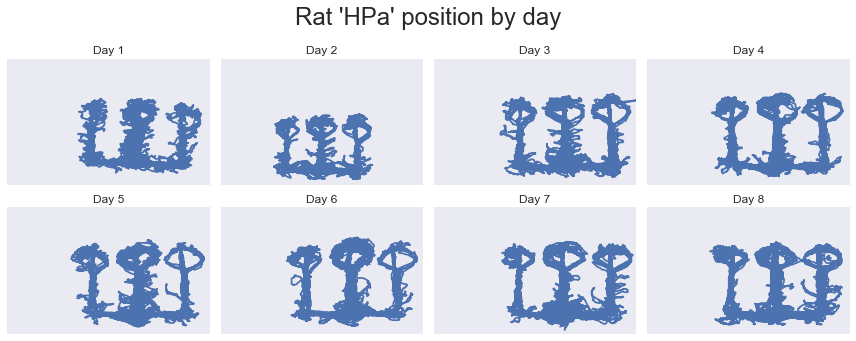

In [13]:
HPa = Animal(directory='HPa_direct', short_name='HPa')
epoch_type = 'run'
environment = 'wtr1'
numDays = 8

plt.figure(figsize=(12, 9))

for day in range(1, numDays + 1):
    x = df.get_pos_var(HPa, day, 'x', epoch_type=epoch_type, environment=environment)
    y = df.get_pos_var(HPa, day, 'y', epoch_type=epoch_type, environment=environment)

    ax = plt.subplot(4, 4, day)
    plt.plot(x[0], y[0])
    plt.title('Day {day}'.format(day=day))
    plt.xlim([0, 150])
    plt.ylim([0, 150])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.suptitle("Rat '{animal}' position by day".format(animal=HPa.short_name), fontsize=24)
sns.set_style("dark")

Now let's match the pulse times from the DIO inputs to the rat's position. The positions should correspond to the ends of the three arms -- the position of the food wells.

In [721]:
day = 1
print(day)
print(epoch_type)
print(environment)
print(get_epoch(HPa, day, epoch_type=epoch_type, environment=''))
# pulse_times = get_DIO_var(HPa, day, 'pulsetimes', epoch_type=epoch_type, environment=environment)
# time = get_pos_var(HPa, day, ['time', 'x', 'y'], epoch_type=epoch_type, environment=environment)
#     for epochs in pulse_times:
#         for pin in epochs:
#             for times in pin[0]:
#                 print(min(abs((times[0] / 1E5) - time)))

1
run
wtr1
[(1, 1), (1, 3), (1, 5)]
